# Machine-learning analysis - Balanced dataset - All patients - Hugo and Variant type - q-value < 1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [3]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_q1 = pd.read_csv('Occurrence_Matrix_TNandNONTNrelgenes_q1_withLabels_VARIANTCLASS_afterMutCLust_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.set_index(occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_q1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
brca_smc_2018_BB01_130 = occurrence_matrix_TNandNONTN_relgenes_q1.loc[['brca_smc_2018_BB01_130']]
brca_smc_2018_BB01_130

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
brca_smc_2018_BB01_130 = brca_smc_2018_BB01_130.reset_index().rename(columns={'index': 'Patient'})
brca_smc_2018_BB01_130

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
brca_smc_2018_BB01_110 = occurrence_matrix_TNandNONTN_relgenes_q1.loc[['brca_smc_2018_BB01_110']]
brca_smc_2018_BB01_110

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
brca_smc_2018_BB01_110 = brca_smc_2018_BB01_110.reset_index().rename(columns={'index': 'Patient'})
brca_smc_2018_BB01_110

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
brca_smc_2018_BB01_130_df = pd.DataFrame(brca_smc_2018_BB01_130)
brca_smc_2018_BB01_130_df

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()
columns_with_all_zeros

0

In [10]:
(occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()

0

There are no rows and no columns with all zero values.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [11]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_q1[['Target']]
patient_target

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_006,0
brca_smc_2018_BB01_008,0
...,...
MBCProject_xlhkS5CG,0
MBCProject_xoHAF6s8,0
MBCProject_yZSnSluK,0
MBCProject_ygcMFgCR,0


In [12]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_q1.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ATAD2B_Intron_noClust,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ATAD2B_Intron_noClust,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust


There aren't patients with zero mutations.

In [14]:
# load the patients you want to keep in the test set 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
onlyhugo_TNandNONTN_test_pts_q1 = pd.read_csv('Test_TNandNONTNpts_onlyhugo_q1.txt', sep=',', engine='python')
onlyhugo_TNandNONTN_test_pts_q1

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_119
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR105
...,...
139,MBCProject_2kS5fYc1
140,MBCProject_7oIotZSe
141,MBCProject_LVSjf8h7
142,MBCProject_pktAIxFb


In [15]:
onlyhugo_TNandNONTN_test_pts_q1_list = onlyhugo_TNandNONTN_test_pts_q1['Patient'].to_list()
onlyhugo_TNandNONTN_test_pts_q1_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_26',
 'MBC_31',


In [16]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_q1['Target'].value_counts()

In [17]:
class_count_0

1170

In [18]:
class_count_1

287

In [19]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (1170, 1464)
Target 1 - TN: (287, 1464)


In [20]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_006
3,brca_smc_2018_BB01_008
4,brca_smc_2018_BB01_009
...,...
1165,MBCProject_xlhkS5CG
1166,MBCProject_xoHAF6s8
1167,MBCProject_yZSnSluK
1168,MBCProject_ygcMFgCR


### Select the patients that you do not want to discard when balancing the datasets.

In [22]:
NONTN_pts_tokeep= pd.merge(NONTN_patient_df, onlyhugo_TNandNONTN_test_pts_q1, how='inner', on=['Patient'])
NONTN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BR170
2,brca_smc_2018_BR331
3,brca_smc_2018_BR371
4,BR-V-028
...,...
67,MBCProject_2kS5fYc1
68,MBCProject_7oIotZSe
69,MBCProject_LVSjf8h7
70,MBCProject_pktAIxFb


In [23]:
NONTN_pts_tokeep_list = NONTN_pts_tokeep['Patient'].tolist()
NONTN_pts_tokeep_list

['brca_smc_2018_BB01_017',
 'brca_smc_2018_BR170',
 'brca_smc_2018_BR331',
 'brca_smc_2018_BR371',
 'BR-V-028',
 'BR-V-051',
 'BR-M-073',
 'PD3993a',
 'X01BR015',
 'X06BR005',
 'X11BR011',
 'X11BR014',
 'X11BR040',
 'X14BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0T5',
 'TCGA-A2-A0YC',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A7-A6VX',
 'TCGA-A8-A08P',
 'TCGA-A8-A093',
 'TCGA-A8-A09M',
 'TCGA-AC-A23E',
 'TCGA-AN-A0XS',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A0TT',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0BZ',
 'TCGA-BH-A0H3',
 'TCGA-BH-A18F',
 'TCGA-BH-A18K',
 'TCGA-BH-A18N',
 'TCGA-BH-A18R',
 'TCGA-BH-A1FG',
 'TCGA-BH-A1FU',
 'TCGA-C8-A12U',
 'TCGA-C8-A26V',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E2-A14V',
 'TCGA-E2-A15F',
 'TCGA-E9-A1R0',
 'TCGA-E9-A1RE',
 'TCGA-EW-A1PD',
 'TCGA-GM-A2DN',
 'TCGA-OL-A5D8',
 'TCGA-OL-A5RU',
 'MBC_110',

### Select the occurrence matrix associated to these 72 NON TN patients 

In [24]:
NONTN_occ_matrix = class_0.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
NONTN_occ_matrix = NONTN_occ_matrix.rename(columns={'index': 'Patient'}, inplace=False)
NONTN_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1166,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1167,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168,MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# extract the 72 NON TN patients 
NONTN_patients_tokeep_occ_matrix = pd.merge(NONTN_occ_matrix, NONTN_pts_tokeep, how='inner', on=['Patient'])
NONTN_patients_tokeep_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BR-V-028,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
NONTN_patients_tokeep_occ_matrix2 = NONTN_patients_tokeep_occ_matrix.set_index('Patient', inplace=False)
NONTN_patients_tokeep_occ_matrix2.index.name = None
NONTN_patients_tokeep_occ_matrix2

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-V-028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create the NON TN occurrence matrix without the 72 patients to keep

In [27]:
class_0_new = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_tokeep_list)]
class_0_new

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1166,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1167,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168,MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Triple-Negative patients 
class_1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [29]:
# SELECT THE PATIENTS

# Extract the row indices as a list
TN_patient_indices = class_1.index.tolist()
# Create a new DataFrame with the patient indices
TN_patient_df = pd.DataFrame({'Patient': TN_patient_indices})
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_022
2,brca_smc_2018_BB01_026
3,brca_smc_2018_BB01_035
4,brca_smc_2018_BB01_037
...,...
282,MBCProject_lQtMtjFR
283,MBCProject_oqupfDu7
284,MBCProject_pMcWcrtZ
285,MBCProject_rJHBiKTl


In [30]:
TN_pts_tokeep= pd.merge(TN_patient_df, onlyhugo_TNandNONTN_test_pts_q1, how='inner', on=['Patient'])
TN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_119
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR105
...,...
67,MBC_205
68,MBC_215
69,MBCProject_d5CbUNTb
70,MBCProject_epUYsdCE


In [31]:
TN_pts_tokeep_list = TN_pts_tokeep['Patient'].tolist()
TN_pts_tokeep_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_26',
 'MBC_31',


In [32]:
total_pts_to_keep = TN_pts_tokeep_list + NONTN_pts_tokeep_list
total_pts_to_keep

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_26',
 'MBC_31',


In [33]:
len(total_pts_to_keep)

144

##  Guided Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [34]:
# load the training patients from only hugo (q<1) dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
onlyhugo_TNandNONTN_training_pts_q1 = pd.read_csv('Training_TNandNONTNpts_onlyhugo_q1.txt', sep=',', engine='python')
onlyhugo_TNandNONTN_training_pts_q1

,Patient
0,TCGA-AO-A0JB
1,TCGA-BH-A0DZ
2,PD4128a
3,PD4203a
4,TCGA-BH-A0BD
...,...
425,MBCProject_QJFdf8hQ
426,MBCProject_lQtMtjFR
427,MBCProject_pMcWcrtZ
428,MBCProject_rJHBiKTl


In [35]:
onlyhugo_TNandNONTN_training_pts_q1.loc[onlyhugo_TNandNONTN_training_pts_q1['Patient']=='brca_smc_2018_BB01_130']

,Patient


In [36]:
onlyhugo_TNandNONTN_training_pts_q1_list = onlyhugo_TNandNONTN_training_pts_q1['Patient'].to_list()
onlyhugo_TNandNONTN_training_pts_q1_list

['TCGA-AO-A0JB',
 'TCGA-BH-A0DZ',
 'PD4128a',
 'PD4203a',
 'TCGA-BH-A0BD',
 'TCGA-E9-A22E',
 'MBC_118',
 'TCGA-E9-A22H',
 'X11BR031',
 'TCGA-D8-A1X5',
 'brca_smc_2018_BR107',
 'brca_smc_2018_BR206',
 'MBCProject_kzuMSZIW',
 'X18BR009',
 'MBC_17',
 'PD4076a',
 'BR-V-070',
 'TCGA-AN-A0G0',
 'TCGA-A2-A0CS',
 'MBCProject_5gHasou8',
 'TCGA-AN-A0AJ',
 'MBC_154',
 'TCGA-V7-A7HQ',
 'TCGA-D8-A13Z',
 'TCGA-A8-A095',
 'TCGA-BH-A0B1',
 'TCGA-E2-A155',
 'X20BR002',
 'TCGA-GM-A2DL',
 'TCGA-E2-A1L7',
 'TCGA-BH-A0DD',
 'TCGA-D8-A1JD',
 'X01BR030',
 'TCGA-EW-A1P5',
 'BR-V-037',
 'TCGA-AN-A0FT',
 'TCGA-BH-A0EE',
 'TCGA-AN-A049',
 'brca_smc_2018_BB01_023',
 'TCGA-LL-A740',
 'brca_smc_2018_BB01_120',
 'TCGA-C8-A26Y',
 'TCGA-AR-A0U3',
 'BR-M-120',
 'brca_smc_2018_BB01_111',
 'TCGA-A8-A096',
 'TCGA-C8-A130',
 'brca_smc_2018_BR205',
 'MBCProject_yZSnSluK',
 'TCGA-C8-A12Z',
 'TCGA-B6-A0I8',
 'TCGA-GM-A2DK',
 'TCGA-D8-A27L',
 'MBCProject_ErfKfJt0',
 'PD4001a',
 'TCGA-A2-A0CU',
 'MBCProject_EWubi6hd',
 'PD4104a

In [37]:
# initial occurrence matrix
occurrence_matrix_TNandNONTN_relgenes_q1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
occurrence_matrix_TNandNONTN_relgenes_q1_2 = occurrence_matrix_TNandNONTN_relgenes_q1.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
occurrence_matrix_TNandNONTN_relgenes_q1_2=occurrence_matrix_TNandNONTN_relgenes_q1_2.rename(columns={'index': 'Patient'}, inplace=False)
occurrence_matrix_TNandNONTN_relgenes_q1_2

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1453,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1454,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1455,MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# create the training set 
occurrence_matrix_TNandNONTN_relgenes_q1_2_training = pd.merge(onlyhugo_TNandNONTN_training_pts_q1, occurrence_matrix_TNandNONTN_relgenes_q1_2, how='inner', on=['Patient'])
occurrence_matrix_TNandNONTN_relgenes_q1_2_training

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PD4128a,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PD4203a,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
427,MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
428,MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [40]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTN_relgenes_q1_2_training['Target'].value_counts())

total class of 1 and 0: Target
0    215
1    215
Name: count, dtype: int64


In [41]:
# create the test set 
occurrence_matrix_TNandNONTN_relgenes_q1_2_test = pd.merge(onlyhugo_TNandNONTN_test_pts_q1, occurrence_matrix_TNandNONTN_relgenes_q1_2, how='inner', on=['Patient'])
occurrence_matrix_TNandNONTN_relgenes_q1_2_test

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,brca_smc_2018_BR105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
brca_smc_2018_BB01_119 = occurrence_matrix_TNandNONTN_relgenes_q1_2_test[occurrence_matrix_TNandNONTN_relgenes_q1_2_test['Patient'] == 'brca_smc_2018_BB01_119']
brca_smc_2018_BB01_119

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
1,brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# drop two patients in the test because I want to substitute them
test_pts_to_drop = ['MBCProject_xlhkS5CG', 'brca_smc_2018_BB01_119']
# Drop rows where 'Patient' column is in the list of patients to drop
occurrence_matrix_TNandNONTN_relgenes_q1_2_test = occurrence_matrix_TNandNONTN_relgenes_q1_2_test[~occurrence_matrix_TNandNONTN_relgenes_q1_2_test['Patient'].isin(test_pts_to_drop)]
occurrence_matrix_TNandNONTN_relgenes_q1_2_test

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,brca_smc_2018_BR105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
occurrence_matrix_TNandNONTN_relgenes_q1_2_test = pd.concat([brca_smc_2018_BB01_130, brca_smc_2018_BB01_110, occurrence_matrix_TNandNONTN_relgenes_q1_2_test], axis=0)
occurrence_matrix_TNandNONTN_relgenes_q1_2_test

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
test_pts_5A = occurrence_matrix_TNandNONTN_relgenes_q1_2_test['Patient'].to_list()
test_pts_5A

['brca_smc_2018_BB01_130',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

In [46]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTN_relgenes_q1_2_test['Target'].value_counts())

total class of 1 and 0: Target
0    72
1    72
Name: count, dtype: int64


In [47]:
occurrence_matrix_TNandNONTN_relgenes_q1_2_training

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PD4128a,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PD4203a,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
427,MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
428,MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [48]:
# drop two patients in the test because I want to substitute them
training_pts_to_drop = ['brca_smc_2018_BB01_110']
# Drop rows where 'Patient' column is in the list of patients to drop
occurrence_matrix_TNandNONTN_relgenes_q1_2_training = occurrence_matrix_TNandNONTN_relgenes_q1_2_training[~occurrence_matrix_TNandNONTN_relgenes_q1_2_training['Patient'].isin(training_pts_to_drop)]
occurrence_matrix_TNandNONTN_relgenes_q1_2_training

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PD4128a,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PD4203a,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
427,MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
428,MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [49]:
occurrence_matrix_TNandNONTN_relgenes_q1_2_training = pd.concat([occurrence_matrix_TNandNONTN_relgenes_q1_2_training, brca_smc_2018_BB01_119], axis=0)
occurrence_matrix_TNandNONTN_relgenes_q1_2_training

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PD4128a,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PD4203a,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
427,MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
428,MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
429,MBCProject_wzCxuoio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
training_pts_5A = occurrence_matrix_TNandNONTN_relgenes_q1_2_training['Patient'].to_list()
training_pts_5A

['TCGA-AO-A0JB',
 'TCGA-BH-A0DZ',
 'PD4128a',
 'PD4203a',
 'TCGA-BH-A0BD',
 'TCGA-E9-A22E',
 'MBC_118',
 'TCGA-E9-A22H',
 'X11BR031',
 'TCGA-D8-A1X5',
 'brca_smc_2018_BR107',
 'brca_smc_2018_BR206',
 'MBCProject_kzuMSZIW',
 'X18BR009',
 'MBC_17',
 'PD4076a',
 'BR-V-070',
 'TCGA-AN-A0G0',
 'TCGA-A2-A0CS',
 'MBCProject_5gHasou8',
 'TCGA-AN-A0AJ',
 'MBC_154',
 'TCGA-V7-A7HQ',
 'TCGA-D8-A13Z',
 'TCGA-A8-A095',
 'TCGA-BH-A0B1',
 'TCGA-E2-A155',
 'X20BR002',
 'TCGA-GM-A2DL',
 'TCGA-E2-A1L7',
 'TCGA-BH-A0DD',
 'TCGA-D8-A1JD',
 'X01BR030',
 'TCGA-EW-A1P5',
 'BR-V-037',
 'TCGA-AN-A0FT',
 'TCGA-BH-A0EE',
 'TCGA-AN-A049',
 'brca_smc_2018_BB01_023',
 'TCGA-LL-A740',
 'brca_smc_2018_BB01_120',
 'TCGA-C8-A26Y',
 'TCGA-AR-A0U3',
 'BR-M-120',
 'brca_smc_2018_BB01_111',
 'TCGA-A8-A096',
 'TCGA-C8-A130',
 'brca_smc_2018_BR205',
 'MBCProject_yZSnSluK',
 'TCGA-C8-A12Z',
 'TCGA-B6-A0I8',
 'TCGA-GM-A2DK',
 'TCGA-D8-A27L',
 'MBCProject_ErfKfJt0',
 'PD4001a',
 'TCGA-A2-A0CU',
 'MBCProject_EWubi6hd',
 'PD4104a

In [51]:
occurrence_matrix_TNandNONTN_relgenes_q1_2_training['Target'].value_counts()

Target
0    215
1    215
Name: count, dtype: int64

In [52]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = pd.concat([occurrence_matrix_TNandNONTN_relgenes_q1_2_training, occurrence_matrix_TNandNONTN_relgenes_q1_2_test], axis=0)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
0,TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PD4128a,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PD4203a,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139,MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Patient'].duplicated().sum()

0

In [54]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.set_index('Patient', inplace=True)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.name=None
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


total class of 1 and 0: Target
0    287
1    287
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

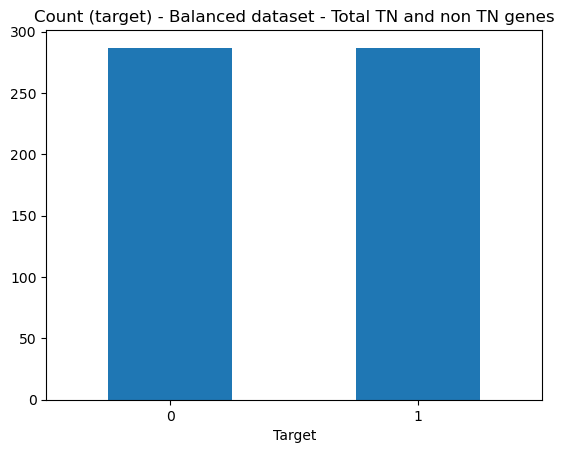

In [55]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [56]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,CEP152_Splice_Site_noClust,KRTAP5-1_In_Frame_Del_noClust,OR4D10_In_Frame_Ins_noClust,KIAA0355_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,EPG5_Splice_Site_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.sum(axis=0)

TP53_Missense_Mutation_270_282         45
MAML3_In_Frame_Ins_503_503              3
PIK3CA_Missense_Mutation_1046_1047     65
TP53_Missense_Mutation_173_177         22
TP53_Missense_Mutation_236_258         42
                                     ... 
SLC26A9_Splice_Region_noClust           1
GARNL3_Nonsense_Mutation_noClust        1
ACACB_Nonsense_Mutation_noClust         0
EPG5_Splice_Site_noClust                0
Target                                287
Length: 1464, dtype: int64

In [58]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [59]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all()
columns_with_all_zero

TP53_Missense_Mutation_270_282        False
MAML3_In_Frame_Ins_503_503            False
PIK3CA_Missense_Mutation_1046_1047    False
TP53_Missense_Mutation_173_177        False
TP53_Missense_Mutation_236_258        False
                                      ...  
SLC26A9_Splice_Region_noClust         False
GARNL3_Nonsense_Mutation_noClust      False
ACACB_Nonsense_Mutation_noClust        True
EPG5_Splice_Site_noClust               True
Target                                False
Length: 1464, dtype: bool

In [60]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all().sum()

541

There are 541 columns containing all zero values.

In [61]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.eq(0).all()]
columns_to_drop

Index(['GATA3_Frame_Shift_Ins_429_434', 'CTCF_Missense_Mutation_283_288',
       'FAM193A_Frame_Shift_Del_1170_1214', 'MAP4K3_Missense_Mutation_395_415',
       'FOXA1_Nonsense_Mutation_254_268', 'FOXA1_Frame_Shift_Del_254_268',
       'PTEN_Nonsense_Mutation_128_131', 'PIK3CA_Silent_1046_1047',
       'TBX3_Frame_Shift_Ins_210_218', 'GATA3_Missense_Mutation_308_335',
       ...
       'SZT2_Splice_Region_noClust', 'GAS8_In_Frame_Del_noClust',
       'IL24_Splice_Site_noClust', 'ATAD2B_Intron_noClust',
       'CEP152_Splice_Site_noClust', 'KRTAP5-1_In_Frame_Del_noClust',
       'OR4D10_In_Frame_Ins_noClust', 'KIAA0355_Splice_Region_noClust',
       'ACACB_Nonsense_Mutation_noClust', 'EPG5_Splice_Site_noClust'],
      dtype='object', length=541)

In [62]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# save the BALANCED dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.to_csv('Occurrence_Matrix_BALANCED_5A.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap

In [65]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1)
X 

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ASH1L_Intron_noClust,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X.index.duplicated().sum()

0

In [67]:
# sum each column
X.sum(axis=0)

TP53_Missense_Mutation_270_282        45
MAML3_In_Frame_Ins_503_503             3
PIK3CA_Missense_Mutation_1046_1047    65
TP53_Missense_Mutation_173_177        22
TP53_Missense_Mutation_236_258        42
                                      ..
PODXL_Splice_Site_noClust              1
CCNT1_Splice_Region_noClust            1
SPRED2_Silent_noClust                  1
SLC26A9_Splice_Region_noClust          1
GARNL3_Nonsense_Mutation_noClust       1
Length: 922, dtype: int64

In [68]:
# select and store the Target column
y = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target']
y

TCGA-AO-A0JB           0
TCGA-BH-A0DZ           0
PD4128a                0
PD4203a                0
TCGA-BH-A0BD           0
                      ..
MBCProject_27uAugT4    0
MBCProject_2kS5fYc1    0
MBCProject_7oIotZSe    0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 574, dtype: int64

In [69]:
train_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(training_pts_5A)]
train_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
MBCProject_wzCxuoio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
y_train = train_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target']
y_train

TCGA-AO-A0JB              0
TCGA-BH-A0DZ              0
PD4128a                   0
PD4203a                   0
TCGA-BH-A0BD              0
                         ..
MBCProject_lQtMtjFR       1
MBCProject_pMcWcrtZ       1
MBCProject_rJHBiKTl       1
MBCProject_wzCxuoio       1
brca_smc_2018_BB01_119    1
Name: Target, Length: 430, dtype: int64

In [71]:
X_train = train_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1)
X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ASH1L_Intron_noClust,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
MBCProject_wzCxuoio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# save the BALANCED dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
X_train.to_csv('5A_balanced_occurrence_matrix_TRAINING_set.txt', index=True, sep='\t')

In [73]:
# SELECT THE PATIENTS of the model

# Extract the row indices as a list
NONTN_patient_indices = X_train.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_indices_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_indices_df

,Patient
0,TCGA-AO-A0JB
1,TCGA-BH-A0DZ
2,PD4128a
3,PD4203a
4,TCGA-BH-A0BD
...,...
425,MBCProject_lQtMtjFR
426,MBCProject_pMcWcrtZ
427,MBCProject_rJHBiKTl
428,MBCProject_wzCxuoio


In [74]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
# save the training patients 
NONTN_patient_indices_df.to_csv('Training_pts_5A.txt', index=False, sep='\t')

In [75]:
test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(test_pts_5A)]
test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,Target
brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.to_list()

['brca_smc_2018_BB01_130',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

In [77]:
y_test = test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target']
y_test

brca_smc_2018_BB01_130    0
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
                         ..
MBCProject_27uAugT4       0
MBCProject_2kS5fYc1       0
MBCProject_7oIotZSe       0
MBCProject_LVSjf8h7       0
MBCProject_pktAIxFb       0
Name: Target, Length: 144, dtype: int64

In [78]:
X_test = test_occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1)
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ASH1L_Intron_noClust,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust
brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# save the BALANCED dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
X_test.to_csv('5A_balanced_occurrence_matrix_TEST_set.txt', index=True, sep='\t')

In [80]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['PIK3CA_In_Frame_Del_418_420', 'FOXA1_Missense_Mutation_254_268',
       'TBX3_Frame_Shift_Del_210_218', 'ESR1_Missense_Mutation_537_538',
       'ITPKB_Missense_Mutation_noClust', 'RSBN1L_Missense_Mutation_noClust',
       'NCOR1_Frame_Shift_Ins_noClust', 'FOXP1_Nonsense_Mutation_noClust',
       'KLHDC2_Missense_Mutation_noClust', 'PLS3_Missense_Mutation_noClust',
       ...
       'FOXP1_Frame_Shift_Ins_noClust', 'LZTR1_Frame_Shift_Ins_noClust',
       'TMEM120B_Frame_Shift_Ins_noClust', 'FAM166B_Silent_noClust',
       'PODXL_Splice_Region_noClust', 'FAM107B_Splice_Region_noClust',
       'TMEM132C_Splice_Site_noClust', 'COL17A1_Nonsense_Mutation_noClust',
       'ZNF230_Frame_Shift_Ins_noClust', 'PEX11G_3'Flank_noClust'],
      dtype='object', length=133)

In [81]:
len(X_train.columns[(X_train == 0).all(axis=0)])

133

There are 133 columns in the training dataset with just 0 values. 

In [82]:
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ASH1L_Intron_noClust,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust
brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['ERBB2_Missense_Mutation_767_777', 'TP53_Frame_Shift_Del_211_218',
       'COL17A1_Missense_Mutation_90_106', 'PIK3CA_Missense_Mutation_418_420',
       'ABCG2_Frame_Shift_Del_22_32', 'TP53_Missense_Mutation_211_218',
       'GATA3_Frame_Shift_Del_429_434', 'NUP93_Missense_Mutation_14_15',
       'PTEN_Frame_Shift_Del_317_318', 'TBX3_In_Frame_Del_210_218',
       ...
       'GPS2_Splice_Site_noClust', 'NIPBL_Splice_Region_noClust',
       'ASH1L_Intron_noClust', 'FCHO1_Splice_Region_noClust',
       'CTTN_Splice_Region_noClust', 'PODXL_Splice_Site_noClust',
       'CCNT1_Splice_Region_noClust', 'SPRED2_Silent_noClust',
       'SLC26A9_Splice_Region_noClust', 'GARNL3_Nonsense_Mutation_noClust'],
      dtype='object', length=531)

In [84]:
len(X_test.columns[(X_test == 0).all(axis=0)])

531

There are 531 columns in the test dataset with just zero values.

In [85]:
y_train.value_counts()

Target
0    215
1    215
Name: count, dtype: int64

In [86]:
y_test.value_counts()

Target
0    72
1    72
Name: count, dtype: int64

In [87]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [88]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ASH1L_Intron_noClust,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust
TCGA-AO-A0JB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0DZ,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
PD4128a,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
PD4203a,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0BD,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0
MBCProject_wzCxuoio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [89]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

133

133 columns contain NaN values, that are the columns with all zero values in the training set.

In [90]:
np.isinf(normalized_X_train).any().any()

False

In [91]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ASH1L_Intron_noClust,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust
TCGA-AO-A0JB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0DZ,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4128a,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4203a,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0BD,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
MBCProject_wzCxuoio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
normalized_X_train.loc['TCGA-D8-A13Z']

TP53_Missense_Mutation_270_282        0.0
MAML3_In_Frame_Ins_503_503            0.0
PIK3CA_Missense_Mutation_1046_1047    0.0
TP53_Missense_Mutation_173_177        0.0
TP53_Missense_Mutation_236_258        0.0
                                     ... 
PODXL_Splice_Site_noClust             0.0
CCNT1_Splice_Region_noClust           0.0
SPRED2_Silent_noClust                 0.0
SLC26A9_Splice_Region_noClust         0.0
GARNL3_Nonsense_Mutation_noClust      0.0
Name: TCGA-D8-A13Z, Length: 922, dtype: float64

In [93]:
normalized_X_train.isna().any().any()

False

In [94]:
normalized_X_train.sum(axis=0)

TP53_Missense_Mutation_270_282        34.0
MAML3_In_Frame_Ins_503_503             2.0
PIK3CA_Missense_Mutation_1046_1047    40.0
TP53_Missense_Mutation_173_177        10.0
TP53_Missense_Mutation_236_258        14.5
                                      ... 
PODXL_Splice_Site_noClust              1.0
CCNT1_Splice_Region_noClust            1.0
SPRED2_Silent_noClust                  1.0
SLC26A9_Splice_Region_noClust          1.0
GARNL3_Nonsense_Mutation_noClust       1.0
Length: 922, dtype: float64

In [95]:
normalized_X_train.sum(axis=0).sum()

1807.6666666666665

In [96]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [97]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ASH1L_Intron_noClust,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust
brca_smc_2018_BB01_130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_110,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_2kS5fYc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_7oIotZSe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [98]:
np.isinf(normalized_X_test).any().any()

True

In [99]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [100]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

133

133 as the number of zero columns in the training set 

In [101]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ASH1L_Intron_noClust,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust
brca_smc_2018_BB01_130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_110,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_2kS5fYc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_7oIotZSe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [102]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,ASH1L_Intron_noClust,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust
brca_smc_2018_BB01_130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_110,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_2kS5fYc1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_7oIotZSe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
np.isinf(normalized_X_test).any().sum()

0

In [104]:
normalized_X_test.isnull().all(axis=0).sum()

0

In [105]:
# extract test patients
test_patient_indices = normalized_X_test.index.tolist()
test_patient_indices

['brca_smc_2018_BB01_130',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

In [106]:
# Create a new DataFrame with the patient indices
test_patient_df = pd.DataFrame({'Patient': test_patient_indices})
test_patient_df

,Patient
0,brca_smc_2018_BB01_130
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_037
3,brca_smc_2018_BB01_126
4,brca_smc_2018_BR097
...,...
139,MBCProject_27uAugT4
140,MBCProject_2kS5fYc1
141,MBCProject_7oIotZSe
142,MBCProject_LVSjf8h7


In [107]:
test_patient_df.loc[test_patient_df['Patient']=='TCGA-E9-A248']

,Patient


In [108]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# save the test patients 
test_patient_df.to_csv('Test_pts_5A.txt', index=False, sep='\t')

### Extracting the features

In [109]:
tot_features = normalized_X_train.columns.tolist()
tot_features

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'GATA3_Frame_Shift_Ins_308_335',
 'PIK3CA_Missense_Mutation_545_546',
 'ERBB2_Missense_Mutation_767_777',
 'GATA3_Splice_Site_308_335',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'TP53_Frame_Shift_Del_211_218',
 'GATA3_Frame_Shift_Ins_406_408',
 'AKT1_Missense_Mutation_17_17',
 'COL17A1_Missense_Mutation_90_106',
 'PIK3CA_Missense_Mutation_418_420',
 'TP53_Nonsense_Mutation_211_218',
 'ABCG2_Frame_Shift_Del_22_32',
 'TP53_Missense_Mutation_191_199',
 'GATA3_Frame_Shift_Del_406_408',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Del_236_258',
 'TP53_Missense_Mutation_211_218',
 'SF3B1_Missense_Mutation_700_700',
 'GATA3_Frame_Shift_Del_429_434',
 'NUP93_Missense_Mutation_14_15',
 'PTEN_Frame_Shift_Del_317_318',
 'TBX3_In_Frame_Del_210_218

In [110]:
# Convert the list into a dataframe 
tot_features_df = pd.DataFrame({'Features': tot_features})
tot_features_df

,Features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_173_177
4,TP53_Missense_Mutation_236_258
...,...
917,PODXL_Splice_Site_noClust
918,CCNT1_Splice_Region_noClust
919,SPRED2_Silent_noClust
920,SLC26A9_Splice_Region_noClust


In [111]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
tot_features_df.to_csv('5A_features.txt', index=False, sep='\t')

#### Extract only the Hugo Symbol from the features 

In [112]:
tot_features_df['Hugo_Symbol'] = tot_features_df['Features'].str.split('_').str[0]
tot_features_df

,Features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_173_177,TP53
4,TP53_Missense_Mutation_236_258,TP53
...,...,...
917,PODXL_Splice_Site_noClust,PODXL
918,CCNT1_Splice_Region_noClust,CCNT1
919,SPRED2_Silent_noClust,SPRED2
920,SLC26A9_Splice_Region_noClust,SLC26A9


In [113]:
tot_features_df.loc[tot_features_df['Hugo_Symbol']=='NOTCH2']

,Features,Hugo_Symbol
107,NOTCH2_Nonsense_Mutation_noClust,NOTCH2
253,NOTCH2_Frame_Shift_Del_noClust,NOTCH2
318,NOTCH2_Silent_noClust,NOTCH2
345,NOTCH2_Missense_Mutation_noClust,NOTCH2


In [114]:
tot_features_df_onlyHugo = tot_features_df[['Hugo_Symbol']]
tot_features_df_onlyHugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,TP53
...,...
917,PODXL
918,CCNT1
919,SPRED2
920,SLC26A9


In [115]:
tot_features_df_onlyHugo.duplicated().sum()

618

In [116]:
# consider just unique genes - drop duplicates 
tot_features_df_onlyHugo_nodup = tot_features_df_onlyHugo.drop_duplicates()
tot_features_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
5,GATA3
7,ERBB2
...,...
804,PODXL
831,LINGO3
859,EIF3C
882,KRTAP5-1


In [117]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
tot_features_df_onlyHugo_nodup.to_csv('5A_features_onlygenes.txt', index=False, sep='\t')

In [118]:
# load the gene features from 4A experiment 
gene_features_4A = pd.read_csv('4A_features_onlygenes.txt', sep=',', engine='python')
gene_features_4A

,Hugo_Symbol
0,TP53
1,PIK3CA
2,ZNF195
3,MAML3
4,PIK3R1
...,...
299,PLTP
300,PODXL
301,HMBS
302,EIF3C


In [119]:
gene_features_4A.loc[gene_features_4A['Hugo_Symbol']=='NOTCH2']

,Hugo_Symbol
49,NOTCH2


In [120]:
# study the intersection between 5A and 4A gene features
pd.merge(tot_features_df_onlyHugo_nodup, gene_features_4A, how='inner', on=['Hugo_Symbol'])

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,GATA3
4,ERBB2
...,...
299,PODXL
300,LINGO3
301,EIF3C
302,KRTAP5-1


In [121]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# create a dataframe with the patient IDs and the target
patients_target = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[['Target']]
patients_target_2 = patients_target.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
patients_target_2 = patients_target_2.rename(columns={'index': 'Patient'}, inplace=False)
patients_target_2

,Patient,Target
0,TCGA-AO-A0JB,0
1,TCGA-BH-A0DZ,0
2,PD4128a,0
3,PD4203a,0
4,TCGA-BH-A0BD,0
...,...,...
569,MBCProject_27uAugT4,0
570,MBCProject_2kS5fYc1,0
571,MBCProject_7oIotZSe,0
572,MBCProject_LVSjf8h7,0


In [123]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,RPGRIP1_Intron_noClust,FCHO1_Splice_Region_noClust,CTTN_Splice_Region_noClust,PEX11G_3'Flank_noClust,PODXL_Splice_Site_noClust,CCNT1_Splice_Region_noClust,SPRED2_Silent_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,Target
TCGA-AO-A0JB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DZ,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4128a,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4203a,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0BD,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_2kS5fYc1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## How many TCGA patients are present in the model?

In [124]:
# SELECT THE PATIENTS of the model

# Extract the row indices as a list
patient_indices = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.tolist()
# Create a new DataFrame with the patient indices
patient_indices_df = pd.DataFrame({'Patient': patient_indices})
patient_indices_df

,Patient
0,TCGA-AO-A0JB
1,TCGA-BH-A0DZ
2,PD4128a
3,PD4203a
4,TCGA-BH-A0BD
...,...
569,MBCProject_27uAugT4
570,MBCProject_2kS5fYc1
571,MBCProject_7oIotZSe
572,MBCProject_LVSjf8h7


In [125]:
# Select rows where Patient IDs start with 'TCGA-'
tcga_patients = patient_indices_df[patient_indices_df['Patient'].str.startswith('TCGA-')]
tcga_patients

,Patient
0,TCGA-AO-A0JB
1,TCGA-BH-A0DZ
4,TCGA-BH-A0BD
5,TCGA-E9-A22E
7,TCGA-E9-A22H
...,...
557,TCGA-E9-A1RE
558,TCGA-EW-A1PD
559,TCGA-GM-A2DN
560,TCGA-OL-A5D8


In [126]:
tcga_patients_list = tcga_patients['Patient'].to_list()
tcga_patients_list

['TCGA-AO-A0JB',
 'TCGA-BH-A0DZ',
 'TCGA-BH-A0BD',
 'TCGA-E9-A22E',
 'TCGA-E9-A22H',
 'TCGA-D8-A1X5',
 'TCGA-AN-A0G0',
 'TCGA-A2-A0CS',
 'TCGA-AN-A0AJ',
 'TCGA-V7-A7HQ',
 'TCGA-D8-A13Z',
 'TCGA-A8-A095',
 'TCGA-BH-A0B1',
 'TCGA-E2-A155',
 'TCGA-GM-A2DL',
 'TCGA-E2-A1L7',
 'TCGA-BH-A0DD',
 'TCGA-D8-A1JD',
 'TCGA-EW-A1P5',
 'TCGA-AN-A0FT',
 'TCGA-BH-A0EE',
 'TCGA-AN-A049',
 'TCGA-LL-A740',
 'TCGA-C8-A26Y',
 'TCGA-AR-A0U3',
 'TCGA-A8-A096',
 'TCGA-C8-A130',
 'TCGA-C8-A12Z',
 'TCGA-B6-A0I8',
 'TCGA-GM-A2DK',
 'TCGA-D8-A27L',
 'TCGA-A2-A0CU',
 'TCGA-D8-A1XZ',
 'TCGA-B6-A0IK',
 'TCGA-AO-A0JC',
 'TCGA-E9-A1RD',
 'TCGA-C8-A1HK',
 'TCGA-C8-A1HG',
 'TCGA-A8-A07Z',
 'TCGA-C8-A12L',
 'TCGA-B6-A1KN',
 'TCGA-A1-A0SM',
 'TCGA-BH-A0DT',
 'TCGA-A7-A0D9',
 'TCGA-AO-A0JF',
 'TCGA-C8-A26W',
 'TCGA-LL-A7SZ',
 'TCGA-AQ-A1H2',
 'TCGA-BH-A0H5',
 'TCGA-A8-A079',
 'TCGA-D8-A1JG',
 'TCGA-GM-A2DA',
 'TCGA-AO-A12D',
 'TCGA-D8-A1Y2',
 'TCGA-AN-A0XL',
 'TCGA-B6-A0I5',
 'TCGA-AR-A24K',
 'TCGA-D8-A1XU',
 'TCGA-3C-AALI

In [127]:
patients_target_2

,Patient,Target
0,TCGA-AO-A0JB,0
1,TCGA-BH-A0DZ,0
2,PD4128a,0
3,PD4203a,0
4,TCGA-BH-A0BD,0
...,...,...
569,MBCProject_27uAugT4,0
570,MBCProject_2kS5fYc1,0
571,MBCProject_7oIotZSe,0
572,MBCProject_LVSjf8h7,0


In [128]:
# select the tcga patients from patients_target_2
tcga_patients_target = patients_target_2[patients_target_2['Patient'].isin(tcga_patients_list)]
tcga_patients_target

,Patient,Target
0,TCGA-AO-A0JB,0
1,TCGA-BH-A0DZ,0
4,TCGA-BH-A0BD,0
5,TCGA-E9-A22E,0
7,TCGA-E9-A22H,0
...,...,...
557,TCGA-E9-A1RE,0
558,TCGA-EW-A1PD,0
559,TCGA-GM-A2DN,0
560,TCGA-OL-A5D8,0


In [129]:
tcga_patients_target['Target'].value_counts()

Target
1    144
0    142
Name: count, dtype: int64

In [130]:
# save the 5A TCGA patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/TCGA_survival_data_intrinsic_subtypes")
tcga_patients_target.to_csv('TCGA_pts_5A.txt', index=False, sep='\t')

## Grid search to find the optimal C parameter for Lasso regression

Liblinear failed to converge, increase the number of iterations.


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=100000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.8467...
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246
Best cross-validation score:  0.7488372093023256


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

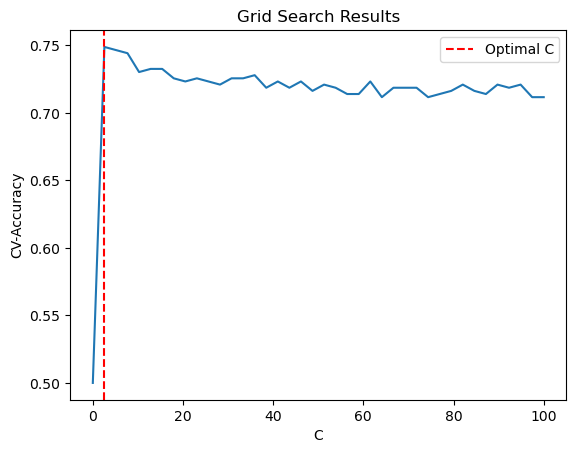

In [127]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=100000) # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression:  0.389 (C=2.57).

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

In [ ]:
precision_scores_1 

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [ ]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

In [ ]:
precision_scores_0

In [ ]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=int(1e6), warm_start=True, intercept_scaling=10000.0, C=2.57)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

In [ ]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

255 features have a coefficent different from zero.

### Study of the function Lasso

In [127]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=100000, warm_start=False, intercept_scaling=10000.0, C=2.57)   

In [128]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

Liblinear failed to converge, increase the number of iterations.


LogisticRegression(C=2.57, intercept_scaling=10000.0, max_iter=100000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [129]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [130]:
y_pred_simple_Lasso

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [131]:
y_test

brca_smc_2018_BB01_130    0
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
                         ..
MBCProject_27uAugT4       0
MBCProject_2kS5fYc1       0
MBCProject_7oIotZSe       0
MBCProject_LVSjf8h7       0
MBCProject_pktAIxFb       0
Name: Target, Length: 144, dtype: int64

In [132]:
print(classification_report(y_test, y_pred_simple_Lasso))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        72
           1       0.80      0.78      0.79        72

    accuracy                           0.79       144
   macro avg       0.79      0.79      0.79       144
weighted avg       0.79      0.79      0.79       144



In [133]:
coef_indexes = clf_simple_LogRegr.coef_[0].nonzero()[0]
# Numero delle feature con coefficiente diverso da zero
n_features = len(coef_indexes)
n_features

171

In [134]:
feature_names = X.columns[coef_indexes]
feature_names

Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'GATA3_Frame_Shift_Ins_308_335',
       'PIK3CA_Missense_Mutation_545_546', 'ERBB2_Missense_Mutation_767_777',
       'GATA3_Splice_Site_308_335', 'TP53_Nonsense_Mutation_191_199',
       ...
       'TRAPPC10_Frame_Shift_Del_noClust', 'MTHFD1L_Frame_Shift_Del_noClust',
       'GBGT1_Missense_Mutation_noClust', 'MYL10_Splice_Region_noClust',
       'CDH1_Splice_Region_noClust', 'ZNF195_Missense_Mutation_noClust',
       'PIK3R1_Frame_Shift_Ins_noClust', 'PLS3_Frame_Shift_Ins_noClust',
       'COIL_Frame_Shift_Ins_noClust', 'ZBTB48_In_Frame_Del_noClust'],
      dtype='object', length=171)

## Evaluate the model with classification metrics 

In [135]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.7916666666666666


In [136]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[58 14]
 [16 56]]


In [137]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [138]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.8


In [139]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [140]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.7777777777777778


In [141]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [142]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.7887323943661971


In [143]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [144]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

56

In [145]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

58

In [146]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

14

In [147]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

16

In [148]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.5835585150955648


In [149]:
coef_indexes_Lasso = clf_simple_LogRegr.coef_[0].nonzero()[0]

# Numero delle feature con coefficiente diverso da zero
n_features_Lasso = len(coef_indexes_Lasso)

# Nomi delle feature con coefficiente diverso da zero
feature_names_Lasso = X.columns[coef_indexes_Lasso]

In [150]:
feature_names_lista_simple_Lasso = list(feature_names_Lasso)
feature_names_lista_simple_Lasso

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'GATA3_Frame_Shift_Ins_308_335',
 'PIK3CA_Missense_Mutation_545_546',
 'ERBB2_Missense_Mutation_767_777',
 'GATA3_Splice_Site_308_335',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_345_345',
 'AKT1_Missense_Mutation_17_17',
 'TP53_Nonsense_Mutation_211_218',
 'ABCG2_Frame_Shift_Del_22_32',
 'TP53_Missense_Mutation_191_199',
 'GATA3_Frame_Shift_Del_406_408',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Del_236_258',
 'PIK3CA_In_Frame_Del_102_113',
 'TP53_In_Frame_Del_191_199',
 'PTEN_Missense_Mutation_128_131',
 'PIK3R1_In_Frame_Ins_566_578',
 'RUNX1_Frame_Shift_Ins_122_123',
 'TP53_Frame_Shift_Ins_236_258',
 'PIK3R1_In_Frame_Del_566_578',
 'ABCG2_Missense_Mutation_22_32',
 'ERBB2_In_Frame_Ins_767_777',
 'PIK3CA_In_Frame_Ins_102_113',
 'FAM208B_Frame_Shift_Ins_805_805',
 'ZNF814_Missens

In [151]:
len(feature_names_lista_simple_Lasso)

171

In [152]:
feature_names_lista_simple_Lasso_df = pd.DataFrame({'Lasso features': feature_names_lista_simple_Lasso})
feature_names_lista_simple_Lasso_df

,Lasso features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_173_177
4,TP53_Missense_Mutation_236_258
...,...
166,ZNF195_Missense_Mutation_noClust
167,PIK3R1_Frame_Shift_Ins_noClust
168,PLS3_Frame_Shift_Ins_noClust
169,COIL_Frame_Shift_Ins_noClust


#### Extract only the Hugo Symbol from the features 

In [153]:
feature_names_lista_simple_Lasso_df['Hugo_Symbol'] = feature_names_lista_simple_Lasso_df['Lasso features'].str.split('_').str[0]
feature_names_lista_simple_Lasso_df

,Lasso features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_173_177,TP53
4,TP53_Missense_Mutation_236_258,TP53
...,...,...
166,ZNF195_Missense_Mutation_noClust,ZNF195
167,PIK3R1_Frame_Shift_Ins_noClust,PIK3R1
168,PLS3_Frame_Shift_Ins_noClust,PLS3
169,COIL_Frame_Shift_Ins_noClust,COIL


In [154]:
feature_names_lista_simple_Lasso_df_onlyHugo = feature_names_lista_simple_Lasso_df[['Hugo_Symbol']]
feature_names_lista_simple_Lasso_df_onlyHugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,TP53
...,...
166,ZNF195
167,PIK3R1
168,PLS3
169,COIL


In [155]:
feature_names_lista_simple_Lasso_df_onlyHugo.duplicated().sum()

56

In [156]:
# consider just unique genes - drop duplicates 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup = feature_names_lista_simple_Lasso_df_onlyHugo.drop_duplicates()
feature_names_lista_simple_Lasso_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
5,GATA3
7,ERBB2
...,...
165,CDH1
166,ZNF195
168,PLS3
169,COIL


In [157]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup.to_csv('5A_features_onlygenes_LASSO.txt', index=False, sep='\t')

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

In [ ]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 0.0974 (C=10.27).

### Compute the classification metrics on the cross-validation results 

In [ ]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

In [ ]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

## Ridge on the test set

In [ ]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=10.27)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

In [ ]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [ ]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=10.27)

In [ ]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

In [ ]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [ ]:
y_pred_simple_Ridge

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [ ]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

In [ ]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

In [ ]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

In [ ]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

In [ ]:
print("F1:", f1(cm_simple_RidgeLogRegr))

In [ ]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

In [ ]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

In [ ]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

In [ ]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

In [ ]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

# Full Logistic Regression

## Cross-validation

In [ ]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty=None)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

In [ ]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

In [ ]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

## Full Logistic Regression on the test set 

In [ ]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty=None) 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [ ]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the full logistic regression function

In [ ]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty=None)

In [ ]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

In [ ]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [ ]:
y_pred_full_logreg

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [ ]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

In [ ]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

In [ ]:
print("Precision ", precision(cm_full_logreg))

In [ ]:
print("Recall:", recall(cm_full_logreg))

In [ ]:
print("F1:", f1(cm_full_logreg))

In [ ]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

In [ ]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

In [ ]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

In [ ]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

In [ ]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

In [ ]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 2.57

### Compute the classification metrics on the cross-validation results

In [ ]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

In [ ]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

# Linear SVM on the test set 

In [ ]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=2.57)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [ ]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the Linear SVM function

In [ ]:
clf_linear_svm = SVC(kernel='linear', C=2.57)

In [ ]:
clf_linear_svm.fit(normalized_X_train, y_train)

In [ ]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [ ]:
y_pred_linear_svm

## Evaluate the model with classification metrics 

In [ ]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

In [ ]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

In [ ]:
print("Precision ", precision(cm_linear_svm))

In [ ]:
print("Recall:", recall(cm_linear_svm))

In [ ]:
print("F1:", f1(cm_linear_svm))

In [ ]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

In [ ]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

In [ ]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

In [ ]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

In [ ]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [ ]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

### Compute the classification metrics on the cross-validation results

In [ ]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

In [ ]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

## Polynomial SVM on the test set 

In [ ]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=0.001, degree=4, coef0=10)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [ ]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the Polynomial SVM function

In [ ]:
clf_poly_svm = SVC(kernel='poly', C=0.001, degree=4, coef0=10)

In [ ]:
clf_poly_svm.fit(normalized_X_train, y_train)

In [ ]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [ ]:
y_pred_poly_svm

## Evaluate the model with classification metrics 

In [ ]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

In [ ]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

In [ ]:
print("Precision ", precision(cm_poly_svm))

In [ ]:
print("Recall:", recall(cm_poly_svm))

In [ ]:
print("F1:", f1(cm_poly_svm))

In [ ]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

In [ ]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

In [ ]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

In [ ]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

In [ ]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [ ]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

### Compute the classification metrics on the cross-validation results

In [ ]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

In [ ]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

### Radial SVM on the test set 

In [131]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=100, gamma=0.001)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [132]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        72
           1       0.81      0.82      0.81        72

    accuracy                           0.81       144
   macro avg       0.81      0.81      0.81       144
weighted avg       0.81      0.81      0.81       144



### Study of the Radial SVM function

In [133]:
clf_radial_svm = SVC(kernel='rbf', C=100, gamma=0.001)

In [134]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=100, gamma=0.001)

In [135]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [136]:
y_test

brca_smc_2018_BB01_130    0
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
                         ..
MBCProject_27uAugT4       0
MBCProject_2kS5fYc1       0
MBCProject_7oIotZSe       0
MBCProject_LVSjf8h7       0
MBCProject_pktAIxFb       0
Name: Target, Length: 144, dtype: int64

In [137]:
y_pred_radial_svm

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [138]:
y_pred_radial_svm_df = pd.DataFrame(y_pred_radial_svm)
y_pred_radial_svm_df = y_pred_radial_svm_df.rename(columns={0: 'Predicted value'})
y_pred_radial_svm_df

,Predicted value
0,0
1,1
2,1
3,1
4,1
...,...
139,1
140,0
141,0
142,0


In [139]:
y_test_df = y_test.to_frame()
y_test_df

,Target
brca_smc_2018_BB01_130,0
brca_smc_2018_BB01_110,1
brca_smc_2018_BB01_037,1
brca_smc_2018_BB01_126,1
brca_smc_2018_BR097,1
...,...
MBCProject_27uAugT4,0
MBCProject_2kS5fYc1,0
MBCProject_7oIotZSe,0
MBCProject_LVSjf8h7,0


In [140]:
y_test_pts_list = y_test_df.index.to_list()
y_test_pts_list

['brca_smc_2018_BB01_130',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

In [141]:
y_pred_radial_svm_df_2 = y_pred_radial_svm_df.set_index(pd.Index(y_test_pts_list))
y_pred_radial_svm_df_2

,Predicted value
brca_smc_2018_BB01_130,0
brca_smc_2018_BB01_110,1
brca_smc_2018_BB01_037,1
brca_smc_2018_BB01_126,1
brca_smc_2018_BR097,1
...,...
MBCProject_27uAugT4,1
MBCProject_2kS5fYc1,0
MBCProject_7oIotZSe,0
MBCProject_LVSjf8h7,0


In [142]:
# merge the two dataframes
y_test_and_pred_svm_radial = pd.merge(y_test_df, y_pred_radial_svm_df_2, left_index=True, right_index=True)
y_test_and_pred_svm_radial

,Target,Predicted value
brca_smc_2018_BB01_130,0,0
brca_smc_2018_BB01_110,1,1
brca_smc_2018_BB01_037,1,1
brca_smc_2018_BB01_126,1,1
brca_smc_2018_BR097,1,1
...,...,...
MBCProject_27uAugT4,0,1
MBCProject_2kS5fYc1,0,0
MBCProject_7oIotZSe,0,0
MBCProject_LVSjf8h7,0,0


In [143]:
y_test_and_pred_svm_radial = y_test_and_pred_svm_radial.reset_index().rename(columns={'index': 'Patient'})
y_test_and_pred_svm_radial

,Patient,Target,Predicted value
0,brca_smc_2018_BB01_130,0,0
1,brca_smc_2018_BB01_110,1,1
2,brca_smc_2018_BB01_037,1,1
3,brca_smc_2018_BB01_126,1,1
4,brca_smc_2018_BR097,1,1
...,...,...,...
139,MBCProject_27uAugT4,0,1
140,MBCProject_2kS5fYc1,0,0
141,MBCProject_7oIotZSe,0,0
142,MBCProject_LVSjf8h7,0,0


In [144]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
y_test_and_pred_svm_radial.to_csv('Test_patients_predicted_values_svm_radial.txt', index=False, sep='\t')

## Evaluate the model with classification metrics 

In [145]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.8125


In [146]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[58 14]
 [13 59]]


In [147]:
print("Precision ", precision(cm_radial_svm))

NameError: name 'precision' is not defined

In [ ]:
print("Recall:", recall(cm_radial_svm))

In [148]:
print("F1:", f1(cm_radial_svm))

NameError: name 'f1' is not defined

In [149]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

59

In [150]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

58

In [151]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

14

In [152]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

13

In [153]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

NameError: name 'mcc' is not defined

## Feature importance analysis for SVM with Radial kernel - ShAP (Shapley Additive exPlanations)

In [154]:
clf_radial_svm_trained = SVC(random_state=123, kernel='rbf', C=100, gamma=0.001, probability=True).fit(normalized_X_train, y_train)

In [155]:
shap.initjs()

In [156]:
# Create a SHAP explainer 
#background_summary = shap.sample(normalized_X_train, 10)
explainer_radial_svm = shap.SamplingExplainer(clf_radial_svm_trained.predict_proba, normalized_X_train)
# Calcola i valori Shapley per le feature del modello addestrato
# Compute the SHAP values for the test data 
shap_values_radial_svm = explainer_radial_svm.shap_values(normalized_X_test) 

#shap_values_radial_svm = explainer_radial_svm(normalized_X_test)

  0%|          | 0/144 [00:00<?, ?it/s]

The warning is suggesting that using all the background data samples may lead to slower computations, and it's recommending alternatives to summarize the background using a smaller set of samples for better efficiency.

In [157]:
shap_values_radial_svm

[array([[ 1.66425499e-02,  8.08409616e-04,  2.96342931e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.86620419e-02,  0.00000000e+00, -3.39471548e-02, ...,
          0.00000000e+00,  0.00000000e+00,  1.52480897e-04],
        [ 1.65668070e-02,  0.00000000e+00, -3.46787823e-02, ...,
          0.00000000e+00,  1.50791898e-04,  0.00000000e+00],
        ...,
        [ 2.07832106e-02,  0.00000000e+00, -2.20539815e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.00767738e-02,  1.15601449e-03, -2.65786993e-02, ...,
         -2.48570474e-04,  1.76002236e-04,  0.00000000e+00],
        [ 1.81892234e-02,  0.00000000e+00, -3.07186059e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([[-1.66425499e-02, -8.08409616e-04, -2.96342931e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.86620419e-02,  0.00000000e+00,  3.39471548e-02, ...,
          0.00000000e+00,  0.00000000e

In [158]:
len(shap_values_radial_svm)

2

In [159]:
shap_values_radial_svm_1 = shap_values_radial_svm[1]
shap_values_radial_svm_1

array([[-1.66425499e-02, -8.08409616e-04, -2.96342931e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.86620419e-02,  0.00000000e+00,  3.39471548e-02, ...,
         0.00000000e+00,  0.00000000e+00, -1.52480897e-04],
       [-1.65668070e-02,  0.00000000e+00,  3.46787823e-02, ...,
         0.00000000e+00, -1.50791898e-04,  0.00000000e+00],
       ...,
       [-2.07832106e-02,  0.00000000e+00,  2.20539815e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.00767738e-02, -1.15601449e-03,  2.65786993e-02, ...,
         2.48570474e-04, -1.76002236e-04,  0.00000000e+00],
       [-1.81892234e-02,  0.00000000e+00,  3.07186059e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [160]:
# Calculate Absolute Mean SHAP Values
shap_abs_radial_svm_1 = np.abs(shap_values_radial_svm_1)
shap_abs_radial_svm_1
# Calculate the Mean of Absolute SHAP Values for Each Instance
# it gives a measure of the average impact of each feature for each instance
k_radial_svm = shap_abs_radial_svm_1.mean(axis=0)
k_radial_svm

array([[1.66425499e-02, 8.08409616e-04, 2.96342931e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.86620419e-02, 0.00000000e+00, 3.39471548e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.52480897e-04],
       [1.65668070e-02, 0.00000000e+00, 3.46787823e-02, ...,
        0.00000000e+00, 1.50791898e-04, 0.00000000e+00],
       ...,
       [2.07832106e-02, 0.00000000e+00, 2.20539815e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00767738e-02, 1.15601449e-03, 2.65786993e-02, ...,
        2.48570474e-04, 1.76002236e-04, 0.00000000e+00],
       [1.81892234e-02, 0.00000000e+00, 3.07186059e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

array([3.00847199e-02, 1.39132415e-03, 7.16630339e-02, 1.67844242e-02,
       1.57927525e-02, 7.53462832e-03, 3.66358141e-02, 4.95289103e-04,
       2.69994985e-03, 9.41172362e-03, 1.39093326e-03, 1.42051304e-02,
       1.41343879e-04, 6.48551883e-04, 1.80904512e-02, 1.12472095e-06,
       2.49653746e-05, 3.82473640e-03, 6.02121201e-05, 2.24048096e-02,
       1.33845044e-03, 2.21362874e-03, 5.36480019e-04, 2.47965894e-04,
       8.51398776e-04, 6.95643989e-05, 4.88814678e-07, 8.51941308e-07,
       8.99123735e-05, 2.36071043e-05, 7.22745026e-05, 5.23138048e-04,
       1.42518214e-03, 7.35935740e-05, 0.00000000e+00, 3.18955027e-05,
       3.83288494e-04, 4.34235434e-04, 0.00000000e+00, 3.13546393e-05,
       5.56736600e-05, 5.62354768e-05, 2.12753643e-06, 5.72063757e-05,
       5.99390393e-05, 6.36818635e-04, 4.86414022e-04, 3.14705807e-03,
       2.21699687e-05, 2.25414906e-05, 6.35484619e-05, 2.52686974e-03,
       0.00000000e+00, 7.00443851e-05, 3.17122612e-05, 6.11031994e-05,
      

In [161]:
len(normalized_X_test.columns)

922

In [162]:
shap_abs_radial_svm_1.shape

(144, 922)

In [163]:
k_radial_svm.shape

(922,)

In [263]:
#feature_importance_poly_svm = pd.DataFrame(list(zip(normalized_X_train.columns, sum(k_poly_svm))), columns=['col_name', 'feature_importance_vals'])


In [164]:
feature_importance_radial_svm = pd.DataFrame({'col_name': normalized_X_test.columns, 'feature_importance_vals': k_radial_svm})
feature_importance_radial_svm.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
feature_importance_radial_svm

,col_name,feature_importance_vals
2,PIK3CA_Missense_Mutation_1046_1047,0.071663
6,PIK3CA_Missense_Mutation_545_546,0.036636
0,TP53_Missense_Mutation_270_282,0.030085
79,TP53_Nonsense_Mutation_noClust,0.029447
111,TP53_Splice_Site_noClust,0.027318
...,...,...
462,TFDP1_Frame_Shift_Del_noClust,0.000000
38,FOXA1_Missense_Mutation_254_268,0.000000
459,MEN1_Frame_Shift_Del_noClust,0.000000
456,NBN_Frame_Shift_Del_noClust,0.000000


In [165]:
feature_importance_radial_svm.head(20)

,col_name,feature_importance_vals
2,PIK3CA_Missense_Mutation_1046_1047,0.071663
6,PIK3CA_Missense_Mutation_545_546,0.036636
0,TP53_Missense_Mutation_270_282,0.030085
79,TP53_Nonsense_Mutation_noClust,0.029447
111,TP53_Splice_Site_noClust,0.027318
81,TP53_Missense_Mutation_noClust,0.027229
19,TP53_Missense_Mutation_191_199,0.022405
189,TP53_Frame_Shift_Ins_noClust,0.021525
92,TP53_Frame_Shift_Del_noClust,0.020046
14,AKT1_Missense_Mutation_17_17,0.018090


In [166]:
# save the Shapley results
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
feature_importance_radial_svm.to_csv('shapley_values_svm_radial_5A.csv')

In [167]:
shap_values_radial_svm[1].shape

(144, 922)

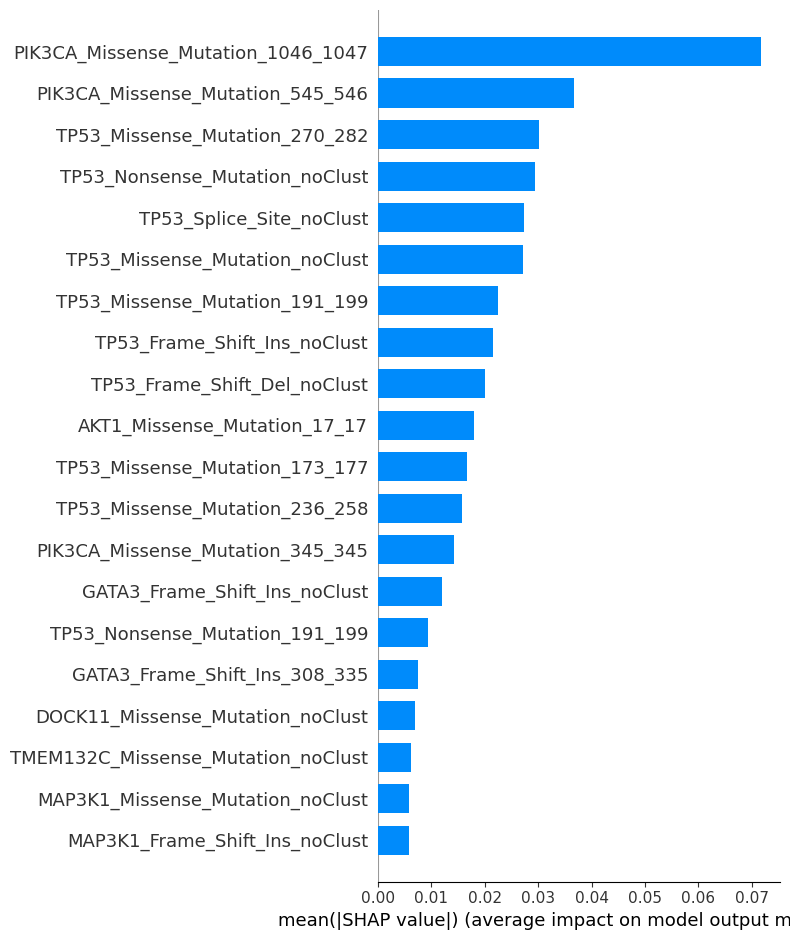

In [168]:
shap.summary_plot(shap_values_radial_svm[1], normalized_X_test, plot_type='bar')

# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40, 45, 50],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


### Compute the classification metrics on the cross-validation results 

In [ ]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

In [ ]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

In [ ]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=40, n_estimators=300, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [ ]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

### Study the Random Forest function

In [ ]:
clf_rf = RandomForestClassifier(max_features=40, n_estimators=300, random_state=123)

In [ ]:
clf_rf.fit(normalized_X_train, y_train)

In [ ]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [ ]:
y_pred_rf

## Evaluate the model with classification metrics 

In [ ]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

In [ ]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

In [ ]:
print("Precision ", precision(cm_rf))

In [ ]:
print("Recall:", recall(cm_rf))

In [ ]:
print("F1:", f1(cm_rf))

In [ ]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

In [ ]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

In [ ]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

In [ ]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

In [ ]:
print("MCC:", mcc(y_test, y_pred_rf))

# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [ ]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

### Compute the classification metrics on the cross-validation results 

In [ ]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

In [ ]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

In [ ]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=200, max_depth=5, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [ ]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

### Study the eXtreme Gradient Boosting function

In [ ]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=200, max_depth=5, random_state=123) 

In [ ]:
clf_xgb.fit(normalized_X_train, y_train)

In [ ]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [ ]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

In [ ]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

In [ ]:
print("Precision ", precision(cm_xgb))

In [ ]:
print("Recall:", recall(cm_xgb))

In [ ]:
print("F1:", f1(cm_xgb))

In [ ]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

In [ ]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

In [ ]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

In [ ]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

In [ ]:
print("MCC:", mcc(y_test, y_pred_xgb))